<a href="https://colab.research.google.com/github/RadovanovicSasha/ml_product_reviews_project/blob/main/notebook/product_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/RadovanovicSasha/ml_product_reviews_project/main/data/product_reviews_sample.csv"
df = pd.read_csv(url)

print(df.shape)
df.head()


(6000, 6)


,review_uuid,product_name,product_price,review_title,review_text,sentiment
0,6eec2597-a08e-47ca-9823-58a2d5f316e6,ZEBRONICS Zeb-Vita Plus 16 W Bluetooth Laptop/...,NaN,Wonderful,nice,positive
1,f715e48c-814a-4a11-ba4e-c91ec3d0d5a3,realme Mobile Game Finger Sleeves Gaming Acce...,NaN,Terrific,best,positive
2,ce6d688d-9732-4041-8ec2-94ab4743502e,Shri Vasunandi Traders chandelier_jhoomar_pend...,NaN,useless product,very bad items,negative
3,89c32b4e-8c41-4fbb-af85-cdf4fb54428c,AutoKraftZ Most Popular Sun UV Protection Arm ...,NaN,Just okay,Ok ok,Neutral
4,eb94dab2-0278-4775-9a4a-0b2677cbd880,Bajaj GX1 500 W Mixer Grinder,NaN,Worth the money,nice,positive


In [9]:
print("Dataset info:")
print()
df.info()



Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_uuid    6000 non-null   object 
 1   product_name   6000 non-null   object 
 2   product_price  5575 non-null   float64
 3   review_title   6000 non-null   object 
 4   review_text    6000 non-null   object 
 5   sentiment      5814 non-null   object 
dtypes: float64(1), object(5)
memory usage: 281.4+ KB


In [12]:
print("Sentiment info i nedostajuće vrednosti (NaN): ")
df['sentiment'].value_counts(dropna=False)


Sentiment info i nedostajuće vrednosti (NaN): 


,count
sentiment,
positive,2999
negative,1180
Positive,736
Negative,422
neutral,359
NaN,186
Neutral,118


In [15]:
print("Nedostajuće vrednosti po kolonama dataset-a: ")
df.isnull().sum()

Nedostajuće vrednosti po kolonama dataset-a: 


,0
review_uuid,0
product_name,0
product_price,425
review_title,0
review_text,0
sentiment,186


In [7]:
# 1) izbaci NaN u sentimentu
df_clean = df.dropna(subset=['sentiment'])

# 2) sve pretvori u mala slova
df_clean['sentiment'] = df_clean['sentiment'].str.lower()

df_clean['sentiment'].value_counts()


/tmp/ipython-input-1737525566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentiment'] = df_clean['sentiment'].str.lower()


,count
sentiment,
positive,3735
negative,1602
neutral,477


In [13]:
print("Ukupno positive/negative feedback: ")
print()
# zadrži samo positive i negative
df_binary = df_clean[df_clean['sentiment'].isin(['positive', 'negative'])]

df_binary['sentiment'].value_counts()


Ukupno positive/negative feedback: 



,count
sentiment,
positive,3735
negative,1602


Vizuelizacija nedostajućih vrednosti: 



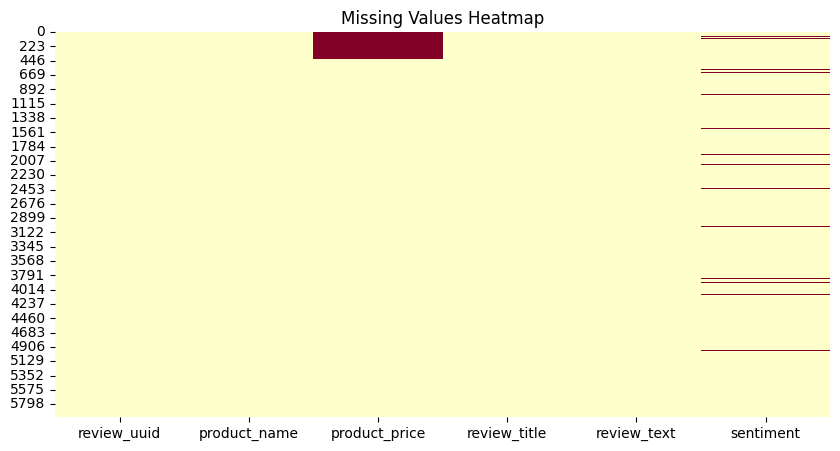

In [14]:
print("Vizuelizacija nedostajućih vrednosti: ")
print()
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()